In [259]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [263]:
x_train = pd.read_csv('C:/Users/Nagore/PycharmProjects/MDLAB2/Mall_Customers.csv')
x_train.drop('CustomerID', axis=1, inplace=True)
x_train.drop('Gender', axis=1, inplace=True)
x_train.drop('Spending Score (1-100)', axis=1, inplace=True)

# Eliminar los elementos que estan dos veces para que dbscan y el nuestro funcionen igual
x_train = x_train.drop_duplicates()
print("Numero de instancias: ",len(x_train))
print(x_train.head())

Numero de instancias:  192
   Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17


In [250]:
epsilon = 3.0  # Radio de búsqueda
min_pts = 4  # Número mínimo de puntos en un cluster

DBSCAN

In [251]:
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts,metric='euclidean')
model=dbscan.fit(x_train)
cluster_labels = dbscan.fit_predict(x_train)

In [252]:
kont = np.sum(cluster_labels == -1)
print("Clasificadas como ruido: ",kont)
print("Clasificadas como cluster: ",np.sum(cluster_labels!=-1))

Clasificadas como ruido:  96
Clasificadas como cluster:  96


In [257]:
sample_cores=np.zeros_like(model.labels_,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(model.labels_))- (1 if -1 in model.labels_ else 0)
print('Numero de clusters:',n_clusters)

Numero de clusters: 13


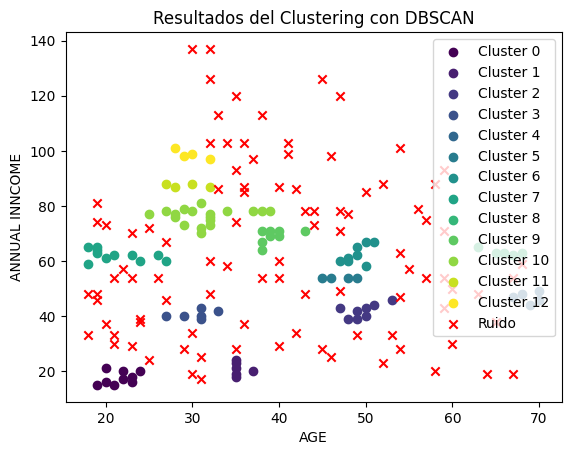

In [268]:
import matplotlib.pyplot as plt


ruido_indices = cluster_labels == -1
no_ruido_indices = cluster_labels != -1

# Separar los puntos ruido y los no ruido
x_train_ruido = x_train[ruido_indices]
x_train_no_ruido = x_train[no_ruido_indices]

# Obtener una lista de etiquetas de cluster únicas
unique_clusters = list(set(cluster_labels))
# Quitar ruido
unique_clusters.remove(-1)

# Colores para cada cluster
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Puntos de cluster
for i, cluster_label in enumerate(unique_clusters):
    cluster_indices = cluster_labels == cluster_label
    plt.scatter(x_train.iloc[cluster_indices, 0], x_train.iloc[cluster_indices, 1], c=[colors[i]], marker='o', label=f'Cluster {cluster_label}')

# Puntos de ruido
plt.scatter(x_train.iloc[ruido_indices, 0], x_train.iloc[ruido_indices, 1], c='red', marker='x', label='Noise Points')

plt.xlabel('AGE')
plt.ylabel('ANNUAL INCOME')
plt.title('Resultados del Clustering con DBSCAN')
plt.legend()
plt.show()

NUESTRO DBSCAN

In [239]:
#https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2_325059373
#https://ieeexplore.ieee.org/abstract/document/7530030?casa_token=Uk83esvD5EoAAAAA:eu8vKBPOToMEPetbIu-JnQBuFEdcpUdeq1SBqn0B2E_CGU71gmZoN4-GCSYOr37btgZMMvLO
#https://ieeexplore.ieee.org/abstract/document/8777081

def dbscan(data, epsilon, min_pts):
    clusters = []
    noise_points = set()
    visited = set()

    def get_neighbors(point):
        neighbors = []
        for p in data:
            if distance(point, p) <= epsilon:
                neighbors.append(p)
        return neighbors

    def expand_cluster(point,neighbors):
        clusterX=[point]
        for point2 in neighbors:
            if point2 not in visited:
                visited.add(point2)
                new_neighbors = get_neighbors(point2)
                if len(new_neighbors) >= min_pts:
                    neighbors.extend(new_neighbors)
            if not any([point2 in cluster for cluster in clusters]):
                if (point2 not in clusterX) and (point2 not in noise_points): #añadido por mi
                    clusterX.append(point2)
        return clusterX

    for point in data:
        if point not in visited:
            visited.add(point)
            neighbors = get_neighbors(point)
            if len(neighbors) < min_pts:
                noise_points.add(point)
            else:
                new_cluster = expand_cluster(point, neighbors)
                clusters.append(new_cluster)
    return clusters, list(noise_points)

# Distancia euclidea
def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))


# Convertir los datos a una lista de tuplas
x_train_tuples = [(row['Age'], row['Annual Income (k$)']) for index, row in x_train.iterrows()]
clusters, noise_points = dbscan(x_train_tuples, epsilon, min_pts)

In [240]:
print("Clasificadas como ruido: ",len(noise_points))
kont=0
for i in range (0,len(clusters)):
    kont=kont+len(clusters[i])
print("Clasificadas como clusters: ",kont)

# ESTAS INSTANCIAS ESTAN CLASIFICADAS COMO RUIDO, PERO DEBERIAN SER CLUSTER (SEGUN DBSCAN)
#[(19, 15), (48, 39), (31, 39), (27, 40), (69, 44), (45, 54), (49, 54), (50, 58), (18, 59), (38, 64), (31, 70), (32, 87), (28, 87), (32, 97), (29, 98)]

Clasificadas como ruido:  111
Clasificadas como clusters:  81


In [241]:
elementos_comunes = []
for cluster in clusters:
    for elemento in cluster:
        if elemento  in noise_points:
            elementos_comunes.append(elemento)


print("Elementos comunes entre clusters y ruido:")
print(elementos_comunes)

Elementos comunes entre clusters y ruido:
[]


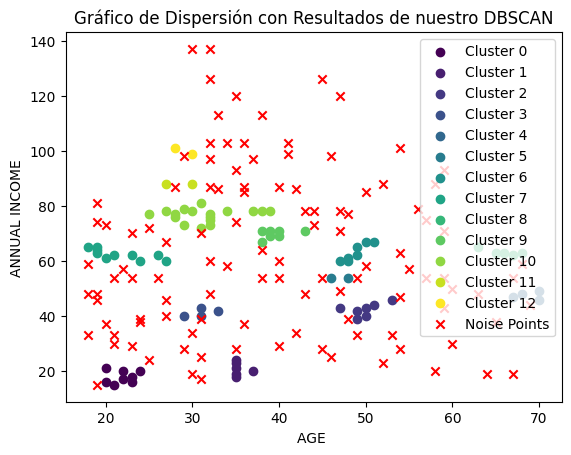

In [271]:
import matplotlib.pyplot as plt
import numpy as np


cluster_points = [np.array(cluster) for cluster in clusters]
noise_points = np.array(noise_points)

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for cluster_points, cluster_id in zip(cluster_points, range(len(clusters))):
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}',c=[colors[cluster_id]])

plt.scatter(noise_points[:, 0], noise_points[:, 1], marker='x', c='red', label='Noise Points')

plt.xlabel('AGE ')
plt.ylabel('ANNUAL INCOME')
plt.title('Gráfico de Dispersión con Resultados de nuestro DBSCAN')
plt.legend()
plt.show()
